<a href="https://colab.research.google.com/github/FANJIYU0825/Tweet-Sentiment-Kaggle/blob/master/Tweet_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sample

In [0]:
#sklearn
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from datetime import datetime
import warnings

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

#cloums
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
import plotly.express as px
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
%matplotlib inline
pd.options.mode.chained_assignment = None


In [55]:
!pip install transformers
!pip install tensorflow==2.1.0
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer
torch.set_grad_enabled(False)



In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/PAPER/Kaggle data /Tweet Sentiment/train.csv')
test = pd.read_csv('/content/drive/My Drive/PAPER/Kaggle data /Tweet Sentiment/test.csv')

In [0]:
train.info()

In [0]:
test.info()

In [0]:
train.sample(5)

The columns denote the following:

* The `textID` of a tweet
* The `text` of a tweet
* The `selected text` which determines the polarity of the tweet
* `sentiment` of the tweet

The test dataset doesn't have the selected text column which needs to be identified.

In [58]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


# First few rows of the training dataset
train.head()

# First few rows of the testing dataset
test.head()

Training data shape:  (27481, 4)
Testing data shape:  (3534, 3)


,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


##Missing values 

In [59]:
#Missing values in training set
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [60]:
#Missing values in test set
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

The `text` and `selected_text` column have one row missing each. Let's get rid of the missing rows.

In [0]:
# Dropping missing values
train.dropna(axis = 0, how ='any',inplace=True) ;

##Analysis of the Sentiment Column

**Distribution of the Sentiment Column**

In [62]:
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [63]:
sentiment_nol =train['sentiment'].value_counts(normalize=True)
sentiment_nol 

neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64

In [66]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[sentiment_nol ])],
    layout_title_text="A Figure Displaying Itself"
)
fig.show()

#data_clean

In [0]:
# Applying the cleaning function to both test and training datasets
train['text_clean'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text_clean'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))

#data 

In [0]:
#  import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [0]:
simple_train = [data['text'][1]]

In [0]:
vect.fit(simple_train)

In [0]:
vect.get_feature_names()

In [0]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

In [0]:
simple_train_dtm.toarray()

In [0]:
df_sample = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

In [0]:
df_sample

#Bert


**use both is most effcient**

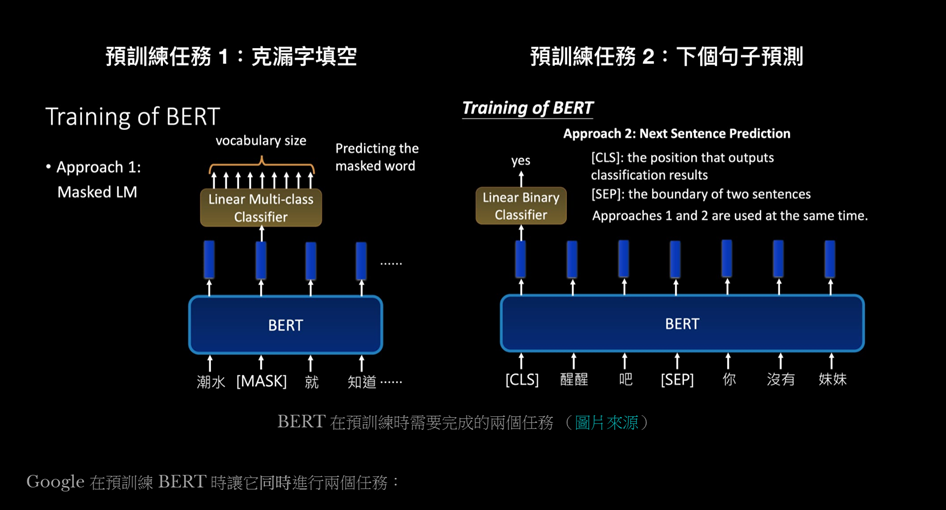)

In [0]:
!pip install transformers
!pip install tensorflow==2.1.0
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer
torch.set_grad_enabled(False)
from IPython.display import clear_output


# 取得此預訓練模型所使用的 tokenizer
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

clear_output()
print("PyTorch 版本：", torch.__version__)

## Getting started with transformers

For the rest of this notebook, we will use the [BERT (Devlin & al., 2018)](https://arxiv.org/abs/1810.04805) architecture, as it's the most simple and there are plenty of content about it
over the internet, it will be easy to dig more over this architecture if you want to.

The transformers library allows you to benefits from large, pretrained language models without requiring a huge and costly computational
infrastructure. Most of the State-of-the-Art models are provided directly by their author and made available in the library 
in PyTorch and TensorFlow in a transparent and interchangeable way. 

In [0]:
!pip install transformers
!pip install tensorflow==2.1.0

In [0]:
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer

torch.set_grad_enabled(False)

In [0]:
# Store the model we want to use
MODEL_NAME = "bert-base-cased"

# We need to create the model and tokenizer
model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

With only the above two lines of code, you're ready to use a BERT pre-trained model. 
The tokenizers will allow us to map a raw textual input to a sequence of integers representing our textual input
in a way the model can manipulate.

In [0]:
# Tokens comes from a process that splits the input into sub-entities with interesting linguistic properties. 
tokens = tokenizer.tokenize("This is an input example")
print("Tokens: {}".format(tokens))

# This is not sufficient for the model, as it requires integers as input, 
# not a problem, let's convert tokens to ids.
tokens_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Tokens id: {}".format(tokens_ids))

# Add the required special tokens
tokens_ids = tokenizer.build_inputs_with_special_tokens(tokens_ids)

# We need to convert to a Deep Learning framework specific format, let's use PyTorch for now.
tokens_pt = torch.tensor([tokens_ids])
print("Tokens PyTorch: {}".format(tokens_pt))

# Now we're ready to go through BERT with out input
outputs, pooled = model(tokens_pt)
print("Token wise output: {}, Pooled output: {}".format(outputs.shape, pooled.shape))

As you can see, BERT outputs two tensors:
 - One with the generated representation for every token in the input `(1, NB_TOKENS, REPRESENTATION_SIZE)`
 - One with an aggregated representation for the whole input `(1, REPRESENTATION_SIZE)`
 
The first, token-based, representation can be leveraged if your task requires to keep the sequence representation and you
want to operate at a token-level. This is particularly useful for Named Entity Recognition and Question-Answering.

The second, aggregated, representation is especially useful if you need to extract the overall context of the sequence and don't
require a fine-grained token-level. This is the case for Sentiment-Analysis of the sequence or Information Retrieval.

The code you saw in the previous section introduced all the steps required to do simple model invocation.
For more day-to-day usage, transformers provides you higher-level methods which will makes your NLP journey easier
Let's improve our previous example

In [0]:
# tokens = tokenizer.tokenize("This is an input example")
# tokens_ids = tokenizer.convert_tokens_to_ids(tokens)
# tokens_pt = torch.tensor([tokens_ids])

# This code can be factored into one-line as follow
tokens_pt2 = tokenizer.encode_plus("This is an input example", return_tensors="pt")

for key, value in tokens_pt2.items():
    print("{}:\n\t{}".format(key, value))

outputs2, pooled2 = model(**tokens_pt2)
print("Difference with previous code: ({}, {})".format((outputs2 - outputs).sum(), (pooled2 - pooled).sum()))

As you can see above, the methode `encode_plus` provides a convenient way to generate all the required parameters
that will go through the model. 

Moreover, you might have noticed it generated some additional tensors: 

- token_type_ids: This tensor will map every tokens to their corresponding segment (see below).
- attention_mask: This tensor is used to "mask" padded values in a batch of sequence with different lengths (see below).

In [0]:
# Single segment input
single_seg_input = tokenizer.encode_plus("This is a sample input")

# Multiple segment input
multi_seg_input = tokenizer.encode_plus("This is segment A", "This is segment B")

print("Single segment token (str): {}".format(tokenizer.convert_ids_to_tokens(single_seg_input['input_ids'])))
print("Single segment token (int): {}".format(single_seg_input['input_ids']))
print("Single segment type       : {}".format(single_seg_input['token_type_ids']))

# Segments are concatened in the input to the model, with 
print()
print("Multi segment token (str): {}".format(tokenizer.convert_ids_to_tokens(multi_seg_input['input_ids'])))
print("Multi segment token (int): {}".format(multi_seg_input['input_ids']))
print("Multi segment type       : {}".format(multi_seg_input['token_type_ids']))

In [0]:
# Padding highlight
tokens = tokenizer.batch_encode_plus(
    ["This is a sample", "This is another longer sample text"], 
    pad_to_max_length=True  # First sentence will have some PADDED tokens to match second sequence length
)

for i in range(2):
    print("Tokens (int)      : {}".format(tokens['input_ids'][i]))
    print("Tokens (str)      : {}".format([tokenizer.convert_ids_to_tokens(s) for s in tokens['input_ids'][i]]))
    print("Tokens (attn_mask): {}".format(tokens['attention_mask'][i]))
    print()